In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
propeller = pd.read_csv('propeller_data.csv')

In [7]:
a = [1, 2, 3]
b = np.asarray(a)
type(b)

numpy.ndarray

In [10]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dhighest, dlowest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [11]:
nb_seg = 10

In [12]:
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)   #get equations of planes for projection

In [13]:
all_plane_points = get_points(upper_blade, planes)                  #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4
Points of plane 5
Points of plane 6
Points of plane 7
Points of plane 8
Points of plane 9


In [16]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

Number 0
length of x
13
length of x
17
 

Number 1
length of x
10
length of x
14
 

Number 2
length of x
9
length of x
12
 

Number 3
length of x
8
length of x
12
 

Number 4
length of x
9
length of x
12
 

Number 5
length of x
11
length of x
15
 

Number 6
length of x
10
length of x
13
 

Number 7
length of x
12
length of x
15
 

Number 8
length of x
12
length of x
12
 



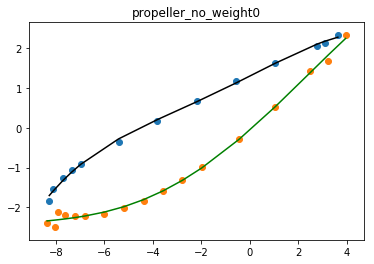

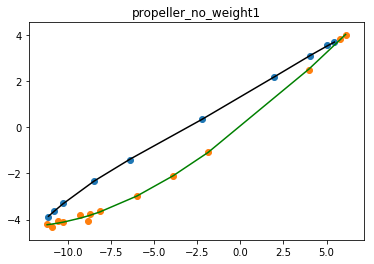

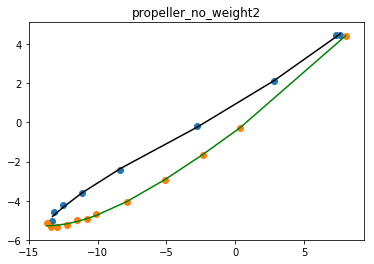

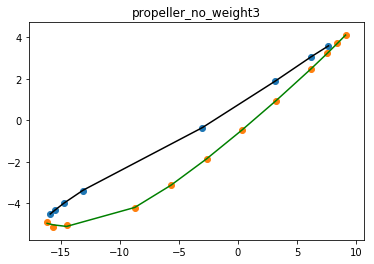

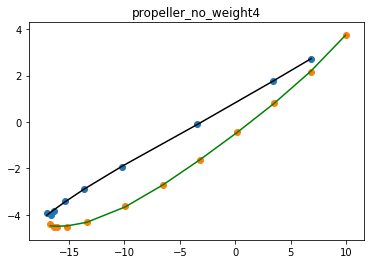

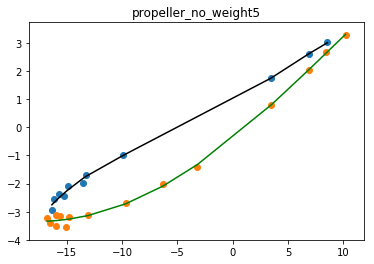

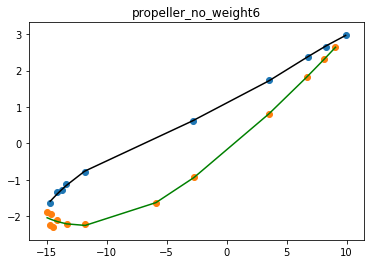

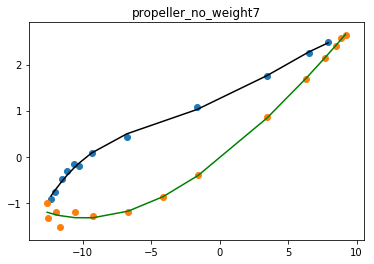

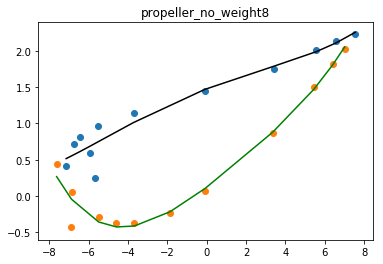

In [17]:
for i in range(9):
    plot_interpolation_both_sides(right_param[i], right_pts[i], left_param[i], left_pts[i], "propeller_no_weight" + str(i))

In [ ]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [24]:
hub_inner_radius = get_hub_inner_radius(propeller_coords, vect_length)
#hub_radius = param_hub_radius(propeller_coords, dmiddle, vect_length)
print(hub_inner_radius)

3.1329621775658256


### Tip radius

In [25]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80402884921583


### Blade twist

In [28]:
blade_twist = get_blade_twist(right_param, left_param, right_pts, left_pts)

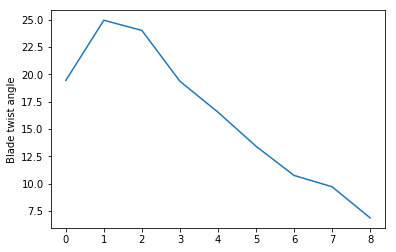

In [29]:
plt.plot(blade_twist)
plt.ylabel('Blade twist angle')
plt.show()

### Chord length

In [30]:
chord_length = get_chord_length(right_param, left_param, right_pts, left_pts)
print(chord_length)

[13.134051225941965, 19.182123379914504, 23.763239861621408, 26.834813072250572, 27.867414522816155, 27.815620255011346, 25.03280864145363, 22.1397321826007, 14.78080930955191]


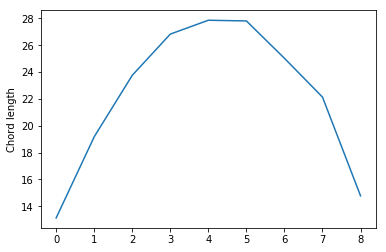

In [31]:
import matplotlib.pyplot as plt
plt.plot(chord_length)
plt.ylabel('Chord length')
plt.show()